<a href="https://colab.research.google.com/github/MatthiasSimons/covid-analysis/blob/main/covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="float:right;"><img src=https://ranking.zeit.de/che/images/logos/Hochschule_8492_2021.png width=80></div>

<h1><span style="color:#009999"> FH Aachen</h1> 


# Programmierung und Auswertung großer Datenmengen
## Einfluss des Entwicklungs- und Wohlstand auf die Covid-19 Pandemie
   
 **Referent:** Prof. Dr. rer. nat. Stephan Jacobs 
    
 **Abgabe:** August 2021 <br>
 <br>
    
 <br>
    
 Fabian Meyer, 3125420
    
 Matthias Simons, 3104576


# Gliederung
Aufbau nach dem CRoos Industry Standard Process for Data Mining (CRISP-DM)

1.   Business Understanding <br>
<font> 1.1 Epidemische Lage </font> <br>
<font> 1.2 Wie kann die epidemische Lage in der Corona Pandemie bewertet werden? </font> <br>
<font> 1.3 Maßnahmen zur Bekämpfung der Corona Pandemie </font> <br>
<font> 1.4 Einfluss von Wohlstand und wirtschaftliche Entwicklung auf die Epidemische Lage </font> <br>
2.   Data Understanding <br>
<font> 2.1 Importieren der Daten </font> <br>
<font> 2.2 Beschreibung der Daten </font> <br>
<font> 2.3 Daten Überblick </font> <br>
3.   Data Preperation <br>
<font> 3.1 Auswahl der relevanten Daten und Länder </font> <br>
<font> 3.2 Prüfen und Verbessern der Datenqualität </font> <br>
<font> 3.3 Feature Engineering - Kennzahlen </font> <br>
4.   Modelling <br>
<font> 4.1 Daten Analyse </font> <br>
<font> 4.2 Modellierung </font> <br>
<font> 4.3 Test </font> <br>
5.   Fazit <br>
6.   Ausblick <br>


## Vorbereitung

Importieren der Bibliotheken



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import folium
import geopandas
import folium
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Business Understanding
## 1.1 Epidemische Lage
Epidemische Situation, Beschreibung und Einschätzung einer Situation in einem bestimmten Gebiet zu einer bestimmten Zeit mit Aussagen zum Auftreten infektiöser Erkrankungen.

## 1.2 Wie kann die epidemische Lage in der Corona Pandemie bewertet werden?
Um die epidemische Lage in der Corona Pandemie in einem Land bewerten zu können, werden unterschiedliche Kennzahlen verglichen. Zu einen können die Corona Fallzahlen und die Todesfälle in Verbindung mit dem Coronavirus bewertet werden. Dabei kann man die absolute Zahl, aber auch die Neuinfektionen und die täglich neu hinzugekommenen Todeszahlen betrachten. Für eine gute Vergleichbarkeit von unterschiedlichen Ländern sind alle Werte in Relation zur Bevölkerung zu sehen. <br>
Neben diesen Kennzahlen spielt die Reproduktionszahl (R-Wert) eine zentrale Rolle bei der Bewertung der Epidemische Lage. Die Reproduktionszahl beschreibt, wie viele Menschen eine infizierte Person im Mittel ansteckt. 

## 1.3 Maßnahmen zur Bekämpfung der Corona Pandemie
Im Kampf gegen das Coronavirus spielen Corona Tests eine zentrale Rolle. Nur wenn ausreichend Testkapazitäten zur Verfügung stehen können erkrankte Personen identifiziert und isoliert werden. Um nachhaltig die Corona Pandemie überwinden zu können muss eine Herdenimunität in der Bevölkerung geschaffen werden. Dazu ist das Impfen unerlässlich. Mit einer steigenden Impfquote sollte ein Trend hin zu weniger Corona Neuinfektionen und Todesopfer zu erkennen sein. <br> 
Um eine unkontrollierte Ausbreitung des Coronavirus zu vermeiden werden von den Ländern unterschiedliche Maßnahmen zur Eindämmung der Corona Pandemie getroffen. Dazu zählen unter anderem Schulschließungen, kontakt,- und Reisebeschränkungen oder Ausgangssperren. Der Stringency Index fasst diese Maßnahmen in ein einheitliches Maß zusammen und macht somit die lokal getroffenen Maßnahmen international vergleichbar.

## 1.4 Einfluss von Wohlstand und wirtschaftliche Entwicklung auf die Epidemische Lage
Im Rahmen dieser Arbeit soll der Einfluss von Wohlstand und wirtschaftlicher Entwicklung auf die Entwicklung der Epidemische Lage beurteilt werden. Wohlstand und wirtschaftliche Entwicklung wird mit dem human development index (HDI) zusammengefasst. Der HDI setzt sich unteranderem aus der Lebenserwartung, der Bildung und dem Einkommen der Bevölkerung zusammen. <br>

- **HDI**

    - 0,800–1,000 (sehr hoch)
    - 0,700–0,799 (hoch)
    - 0,550–0,699 (mittel)
    - 0,350–0,549 (niedrig)


Gibt es einen Zusammenhang zwischen Corona Fallzahlen, Todesopfern, dem Wohlstand und der wirtschaftlichen Entwicklung? Verläuft die Impfkampagne in wirtschaftlich gut entwickelten Ländern scheller oder stehen dort mehr Krankenhausbetten für die Bevölkerung zur Verfügung wodurch möglicherweise weniger Todesfälle auftreten?

# 2. Data Understanding

Datensatz von "Our World in Data" <br>
Name des Datensatzes: Data on COVID-19 (coronavirus) <br>

| Metrics                     | Source                                                    | Updated | Countries |
|-----------------------------|-----------------------------------------------------------|---------|-----------|
| Vaccinations                | Official data collated by the Our World in Data team      | Daily   | 209       |
| Tests & positivity          | Official data collated by the Our World in Data team      | Weekly  | 129       |
| Hospital & ICU              | Official data collated by the Our World in Data team      | Weekly  | 34        |
| Confirmed cases             | JHU CSSE COVID-19 Data                                    | Daily   | 191       |
| Confirmed deaths            | JHU CSSE COVID-19 Data                                    | Daily   | 183       |
| Reproduction rate           | Arroyo-Marioli F, Bullano F, Kucinskas S, Rondón-Moreno C | Daily   | 182       |
| Policy responses            | Oxford COVID-19 Government Response Tracker               | Daily   | 181       |
| Other variables of interest | International organizations (UN, World Bank, OECD, IHME…) | Fixed   | 218       |

source: https://github.com/owid/covid-19-data/blob/master/public/data/README.md <br>
Betrachtungsperiode: 01.06.2020 - 01.07.2021 <br>

## 2.1 Importieren der Daten

In [2]:
# the dataset csv file is from github user owid. The file was saved for backup purposes

dataset = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", sep=',')
#dataset.to_csv(r"data/covid-dataset.csv") #25.07.2021
#dataset = pd.read_csv(r"data/covid-dataset.csv", sep=',')
dataset.name ="Dataset"
#dataset["date"] = pd.to_datetime(dataset["date"]) ### weg

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
dataset.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.03,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,3.89e+07,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.03,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,3.89e+07,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,NaN


## 2.2 Beschreibung der Daten

Bei dem Datensatz handelt es sich um einen Datensatz der diverse Variablen im Zusammenhang mit der Covid-19 Pandemie weltweit und täglich abbildet. Der Datensatz beinhaltet 61 Spalten und wird täglich mit den neusten Zahlen aktualisiert. In der folgenden Tabelle werden die Quellen der Spalten und eine kurze Beschreibung dargestellt. 

In [3]:
# the description csv file is from github user owid. The file was saved for backup purposes
#description = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv", sep=',')
#description.to_csv(r"data/covid-dataset_column-description.csv") #25.07.2021

pd.options.display.max_rows = 10 # Anzahl dargesteller Zeilen
pd.read_csv(r"data/covid-dataset_column-description.csv")

,Unnamed: 0,column,source,description
0,0,iso_code,International Organization for Standardization,ISO 3166-1 alpha-3 – three-letter country codes
1,1,continent,Our World in Data,Continent of the geographical location
2,2,location,Our World in Data,Geographical location
3,3,date,Our World in Data,Date of observation
4,4,total_cases,COVID-19 Data Repository by the Center for Sys...,Total confirmed cases of COVID-19
...,...,...,...,...
55,55,handwashing_facilities,United Nations Statistics Division,Share of the population with basic handwashing...
56,56,hospital_beds_per_thousand,"OECD, Eurostat, World Bank, national governmen...","Hospital beds per 1,000 people, most recent ye..."
57,57,life_expectancy,"James C. Riley, Clio Infra, United Nations Pop...",Life expectancy at birth in 2019
58,58,human_development_index,United Nations Development Programme (UNDP),A composite index measuring average achievemen...


Im folgenden wird untersucht welche Datentypen vertreten sind. Es sind überwiegend numerische Werte.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109100 entries, 0 to 109099
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               109100 non-null  object 
 1   continent                              104053 non-null  object 
 2   location                               109100 non-null  object 
 3   date                                   109100 non-null  object 
 4   total_cases                            104423 non-null  float64
 5   new_cases                              104420 non-null  float64
 6   new_cases_smoothed                     103410 non-null  float64
 7   total_deaths                           93996 non-null   float64
 8   new_deaths                             94151 non-null   float64
 9   new_deaths_smoothed                    103410 non-null  float64
 10  total_cases_per_million                103870 non-null  

## 2.3 Daten Überblick
Überblick über die Daten durch erste graphische Darstellung erhalten 

In [5]:
def interactive_plot(df):
    dataset=df
    def plot(location, column):
        dataset = df
        dataset["date"] = pd.to_datetime(dataset["date"])
        dataset = dataset[dataset["location"]==location]
        fig, ax = plt.subplots(figsize=(20,10))
        plt.title("{} in {}".format(column, location))
        sns.lineplot(x="date", y=column, data=dataset)
        
        #dataset["date"] = pd.to_datetime(dataset["date"])
        
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y')) #'%Y.%m.%d %H:%M:%S'

        # put the labels at 45deg since they tend to be too long
        fig.autofmt_xdate()
    
    countries_of_interest = [
        "Germany",
        "China",
        "India",
        "Israel",
        "Brazil",
        "United Kingdom",
        "Italy",
        "United States",
        "South Africa"
    ]
    
    for location in dataset["location"].unique().tolist():
        if location not in countries_of_interest:
            countries_of_interest.append(location)
            
            
    locations=countries_of_interest#dataset["location"].unique().tolist()
    
    del_columns_plot = ["iso_code", "continent", "location", "date", "passed_days"]
    columns_plot = dataset.columns.tolist()

    for del_column_plot in del_columns_plot:
        if del_column_plot in columns_plot:
            columns_plot.remove(del_column_plot)
        else:
            pass
    
    interact(plot, location=locations, column=columns_plot)

interactive_plot(dataset)

interactive(children=(Dropdown(description='location', options=('Germany', 'China', 'India', 'Israel', 'Brazil…

In [6]:
## interaktive Darstellung
pd.options.mode.chained_assignment = None
def create_map(dataset, column, date):
    #date = "2021-06-24" #dataset["date"].values[-1] #"2021-06-24" 
    dataset = dataset[dataset["date"] == date]
    dataset["date"] = dataset["date"].astype(str)
    dataset.drop(columns=["date"])
    world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
    merged_dataset = world.merge(dataset, how="left", left_on = ["iso_a3"], right_on = ["iso_code"])
    
    world_map = folium.Map()
    folium.Choropleth(
        geo_data=merged_dataset,
        name="choropleth",
        data=merged_dataset,
        columns=["iso_a3",column],
        key_on="feature.properties.iso_a3",
        fill_color="YlGn",
        fill_opacity=0.8,
        line_opacity=1,
        nan_fill_color="grey",
        nan_fill_opacity=0.4,
        legend_name=column,
    ).add_to(world_map)
    return world_map

def f(column, day):
    
    dataset.sort_values(by = 'date', inplace=True)
    dates = dataset["date"].unique().astype(str).tolist()

    dates.sort
    dates_dict = {}

    for i in range(0, len(dates)):
        dates_dict[i] = dates[i]
    
    df=dataset
    #df["passed_days"] = df["passed_days"].astype(str)
    date = dates_dict[day]
    print(date)
    return create_map(dataset, column, date)
    

del_columns = ["Unnamed: 0", "iso_code", "continent", "location", "date"]
columns_map = dataset.columns.tolist()
dates_map = dataset["date"].unique().astype(str).tolist()

for del_column in del_columns:
    if del_column in columns_map:
        columns_map.remove(del_column)
    else:
        pass

interact(f, column=columns_map, day = widgets.IntSlider(min=0, max=len(dates_map)-1, step=1, value=len(dates_map)-1))

interactive(children=(Dropdown(description='column', options=('total_cases', 'new_cases', 'new_cases_smoothed'…

<function __main__.f(column, day)>

# 3. Data Preperation

## 3.1 Auswahl der relevanten Daten und Länder

Aus dem Datensatz werden vorerst die relevanten Daten ausgewählt. Relevante Daten sind unteranderem:

    - kumulierte Impf-, Fall- und Todeszahlen pro eine Millionen Einwohner
    - mittlere Reproduktionszahl
    - Brutto-Inlandsprodukt
    - Maßnahmen ("Stringency Index")
    - Anzahl Krankehausbetten pro Einwohner

Desweiteren wird die Korrelation der Variabeln betrachtet. Zur Vermeidung von Multikollinearität werden Variabeln mit hoher Korrelation zusammengefasst oder entfernt. Dies kann am Beispiel des Index der menschlichen Entwicklung (Human Development Index) kurz HDI erläutert werden. Der Index setzt sich aus drei Dimensionen zusammen, die zum Teil in bereits vorhandenen Spalten abgebildet sind.
1. Lebenserwartungsindex -> life_expectancy / median_age
2. Bildungsindex
3. Einkommensindex -> gdp_per_capita

Die Auswahl der Daten ist ein sehr iterativer Prozess.
1. Auswahl potentiell interessanter Spalten
2. Untersuchung der Korrelation
3. Untersuchung der Multikollinearität
-> iteratives aussortieren von Spalten

In [7]:
print("Der ursprüngliche Datensatz hat {} Zeilen und {} Spalten".format(dataset.shape[0], dataset.shape[1]))

Der ursprüngliche Datensatz hat 109100 Zeilen und 62 Spalten


In [8]:
columns_of_interest = [
    'iso_code',
    'date',
    'location',
    'continent',
    'total_cases_per_million',
    'total_deaths_per_million',
    #"new_cases_per_million",
    "new_deaths_per_million",
    #'reproduction_rate', # geringe Korrelation
    'people_fully_vaccinated_per_hundred', # geringe Korrelation
    #'stringency_index', # geringe Korrelation
    'population_density', # geringe Korrelation
    #'median_age', # hohe Korrelation/ähnlicher Informationsgehalt mit HDI
    #'gdp_per_capita', # hohe Korrelation/ähnlicher Informationsgehalt mit HDI #Bruttoinlandsprodukt pro Kopf
    #'life_expectancy', # hohe Korrelation/ähnlicher Informationsgehalt mit HDI
    "hospital_beds_per_thousand",
    'human_development_index',   
]

cleaned_dataset = dataset.drop(dataset.columns.difference(columns_of_interest), 1)

print("von ursprünglich {} Spalten bleiben noch {} Spalten".format(len(dataset.columns.tolist()), len(columns_of_interest)))

von ursprünglich 62 Spalten bleiben noch 11 Spalten


Ähnliche Variabeln mit hoher Korrelation werden gelöscht -> ähnlicher Informationsgehalt; so simpel wie möglich
- r = 0.1 für eine geringe Korrelation
- r = 0.3 für eine mittlere Korrelation
- r = 0.5 für eine hohe Korrelation

Quelle: http://www.methoden-psychologie.de/wertebereich_korrelationen.html

total_cases_per_million     total_deaths_per_million               0.8
human_development_index     hospital_beds_per_thousand             0.6
total_cases_per_million     people_fully_vaccinated_per_hundred    0.5
new_deaths_per_million      total_deaths_per_million               0.4
total_cases_per_million     human_development_index                0.4
human_development_index     total_deaths_per_million               0.3
hospital_beds_per_thousand  population_density                     0.3
total_cases_per_million     new_deaths_per_million                 0.3
human_development_index     people_fully_vaccinated_per_hundred    0.3
dtype: float64

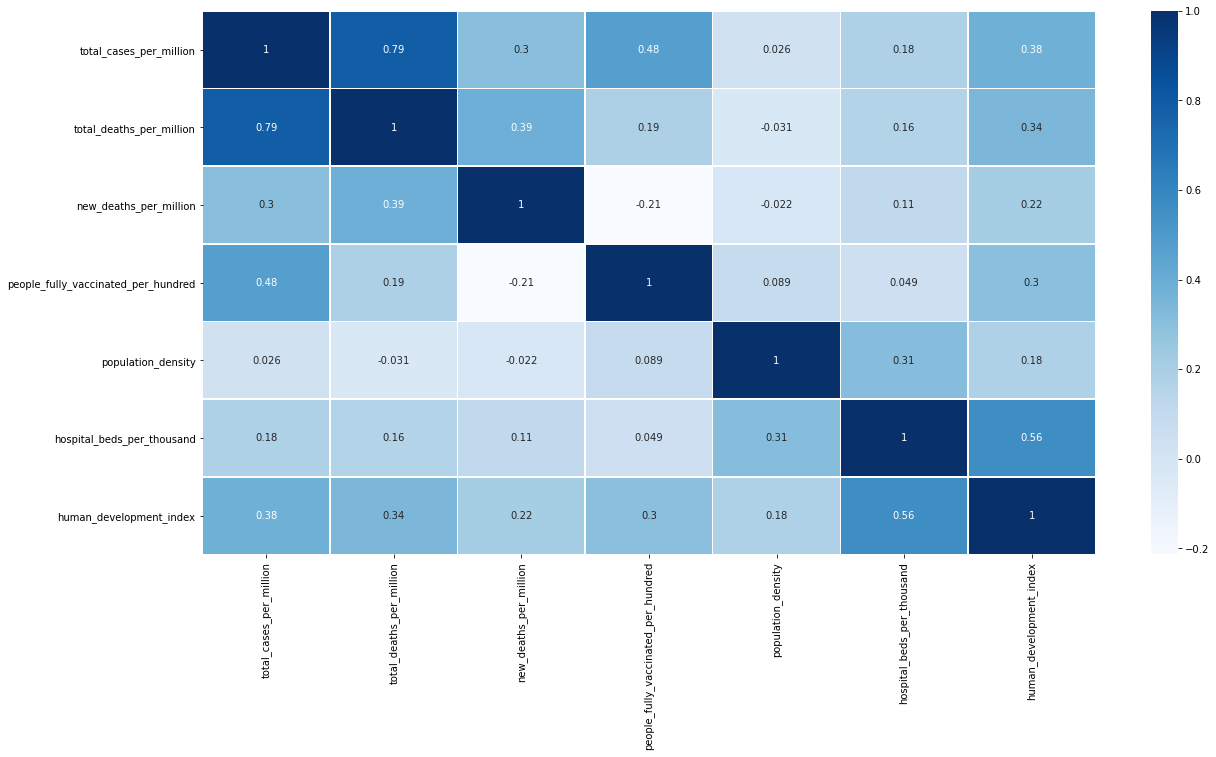

In [9]:
corr = cleaned_dataset.corr()
#corr = corr[abs(corr)>0.3]
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, linewidths=.5, cmap=sns.color_palette("Blues", as_cmap=True))

sorted_corr = corr.unstack().sort_values(ascending=False).drop_duplicates()
sorted_corr = sorted_corr[sorted_corr != 1].round(1)
sorted_corr = sorted_corr[abs(sorted_corr) >= 0.3]
sorted_corr

Der VIF Index beschreibt die Multikollinearität der Variablen und sollte einen Wert von 5 nicht überschreiten

Quelle: (Ringle et al., 2015) https://www.researchgate.net/post/Multicollinearity_issues_is_a_value_less_than_10_acceptable_for_VIF

In [10]:
X = cleaned_dataset.drop(["new_deaths_per_million", "date"], axis=1)
X = X.select_dtypes(exclude=['object'])
X = X.dropna()

vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif.sort_values(by="vif_Factor", ascending=False))

                              features  vif_Factor
0              total_cases_per_million        6.55
5              human_development_index        6.54
1             total_deaths_per_million        4.17
4           hospital_beds_per_thousand        4.02
2  people_fully_vaccinated_per_hundred        2.26
3                   population_density        1.21


Die Variablen "human_development_index" und "total_cases_per_million" haben einen VIF Faktor größer als 5. Dennoch werden sie für spätere Untersuchungen weiter betrachtet.

## 3.2 Prüfen und Verbessern der Datenqualität

Für spätere Untersuchungen und Modelle ist eine qualitativ gute Datenbasis notwendig. Aus diesem Grund wird im folgenden die Datenqualität geprüft und der Umgang mit fehlenden Werten behandelt.

Es gibt verschiedene Gründe für fehlende Werte:

- Daten werden im Land nicht gemessen oder sind nicht verfügbar
    - In einigen Ländern ist eine schlechtere Dateninfrastruktur vorhanden
    - Folge: Land wird nicht betrachten
    

- Daten waren zum Zeitpunkt noch nicht verfügbar
    - Impfstoffe mussten erst entwickelt werden, deswegen sind zum Beginn der Pandemie keine Werte angegeben
    - Umgang: Fehlende Werte durch sinnvolle Werte ersetzen. Bspw: Anzahl Impfungen bis zur ersten Impfung durch "0" ersetzen

Wichtig ist auf die Korrelation zur Zielvariabel und auf Variablen mit hohem Informationsgehalt zu achten. Fraglich ist auch ob Werte aufgrund der Wirtschaftlichen Lage eines Landes fehlen.

**In welchen Ländern fehlen Werte?**

Es werden noch 94 von ursprünglich 232 Ländern betrachtet


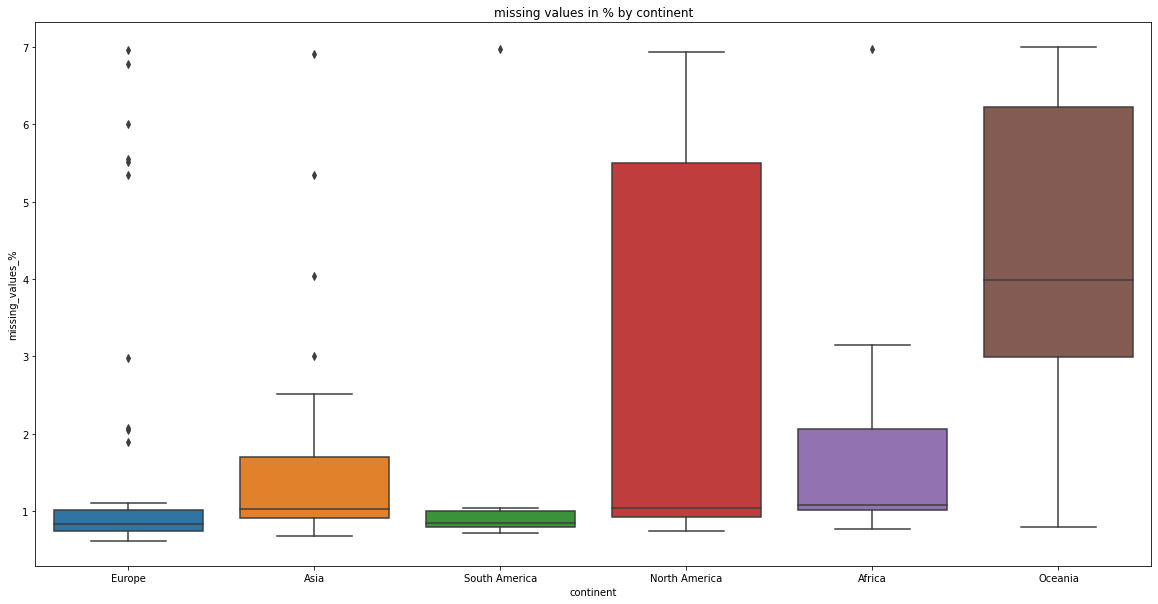

In [11]:
def continent_from_location(location):
    return list(dict.fromkeys(cleaned_dataset[cleaned_dataset["location"] == location]["continent"].values.tolist()))[0]

def get_locations():
    return list(dict.fromkeys(cleaned_dataset["location"].values.tolist()))

def get_missing_values(location):
    missing_values = cleaned_dataset[cleaned_dataset["location"] == location].isna().sum()
    values = cleaned_dataset[cleaned_dataset["location"] == location].isna().count()

    return (missing_values/values).sum()

locations_continent_dic = {}

for location in get_locations():
    locations_continent_dic[location] = (continent_from_location(location),get_missing_values(location))

missing_values_df = pd.DataFrame(data=locations_continent_dic).T.rename(columns={0: "continent", 1: "missing_values_%"})
missing_values_df.sort_values(by="missing_values_%", inplace=True)

# plot missing values by continent
fig, ax = plt.subplots(figsize=(20,10))
plt.title(("missing values in % by continent"))
sns.boxplot(x="continent", y="missing_values_%", data=missing_values_df)

missing_values_df = missing_values_df[missing_values_df["missing_values_%"]<=1]

countries = missing_values_df.index

countries_cleaned_dataset = cleaned_dataset[cleaned_dataset["location"].isin(countries)] 

print("Es werden noch {} von ursprünglich {} Ländern betrachtet".format(len(missing_values_df), len(get_locations())))

**In welchen Spalten fehlen Werte?**

In [12]:
100*cleaned_dataset.isna().sum()/cleaned_dataset.isna().count()

iso_code                                0.00
continent                               4.63
location                                0.00
date                                    0.00
total_cases_per_million                 4.79
                                       ...  
new_deaths_per_million                 14.20
people_fully_vaccinated_per_hundred    83.85
population_density                      7.29
hospital_beds_per_thousand             18.82
human_development_index                10.69
Length: 11, dtype: float64

In der Spalte "people_fully_vaccinated_per_hundred" fehlen ~85 %  der Werte. Wie bereits beschrieben, fehlen die Werte vermutlich aufgrund der späten Einführung von Impfstoffen. Aus diesem Grund werden die fehlenden Werte durch "0" ersetzt.

In [13]:
# Impfdaten waren zum Beginn der Pandemie noch nicht vorhanden

def fill_nan_values(series):
    nr = cleaned_dataset[series].isna().sum()
    cleaned_dataset[series].backfill(0, inplace = True)
    cleaned_dataset[series].interpolate(inplace = True)
    print("In der Spalte {} wurden die fehlenden Werte von {} auf {} reduziert".format(series, nr, cleaned_dataset[series].isna().sum()))

for column in cleaned_dataset.columns:
    try:
        fill_nan_values(column)
    except Exception as e:
        print("Fehler bei {}".format(e))

# continents has been tracked as countries 
continent_list = cleaned_dataset[cleaned_dataset["continent"].isna() == True].index.get_level_values(0).unique().tolist()
cleaned_dataset.drop(continent_list, inplace = True)

In der Spalte iso_code wurden die fehlenden Werte von 0 auf 0 reduziert
In der Spalte continent wurden die fehlenden Werte von 5047 auf 0 reduziert
In der Spalte location wurden die fehlenden Werte von 0 auf 0 reduziert
In der Spalte date wurden die fehlenden Werte von 0 auf 0 reduziert
In der Spalte total_cases_per_million wurden die fehlenden Werte von 5230 auf 0 reduziert
In der Spalte total_deaths_per_million wurden die fehlenden Werte von 15644 auf 0 reduziert
In der Spalte new_deaths_per_million wurden die fehlenden Werte von 15489 auf 0 reduziert
In der Spalte people_fully_vaccinated_per_hundred wurden die fehlenden Werte von 91477 auf 0 reduziert
In der Spalte population_density wurden die fehlenden Werte von 7958 auf 0 reduziert
In der Spalte hospital_beds_per_thousand wurden die fehlenden Werte von 20533 auf 0 reduziert
In der Spalte human_development_index wurden die fehlenden Werte von 11666 auf 0 reduziert


**Wann fehlen Werte?**

Die Datenlage war zu beginn der Pandemie schlecht. Erst musste eine Infrastruktur für die Datenübermittlung aufgebaut werden.

Juli 2021 Datenlage wird schlechter. Daher werden die nur die Werte bis bis zum 01.07.2021 betrachtet.

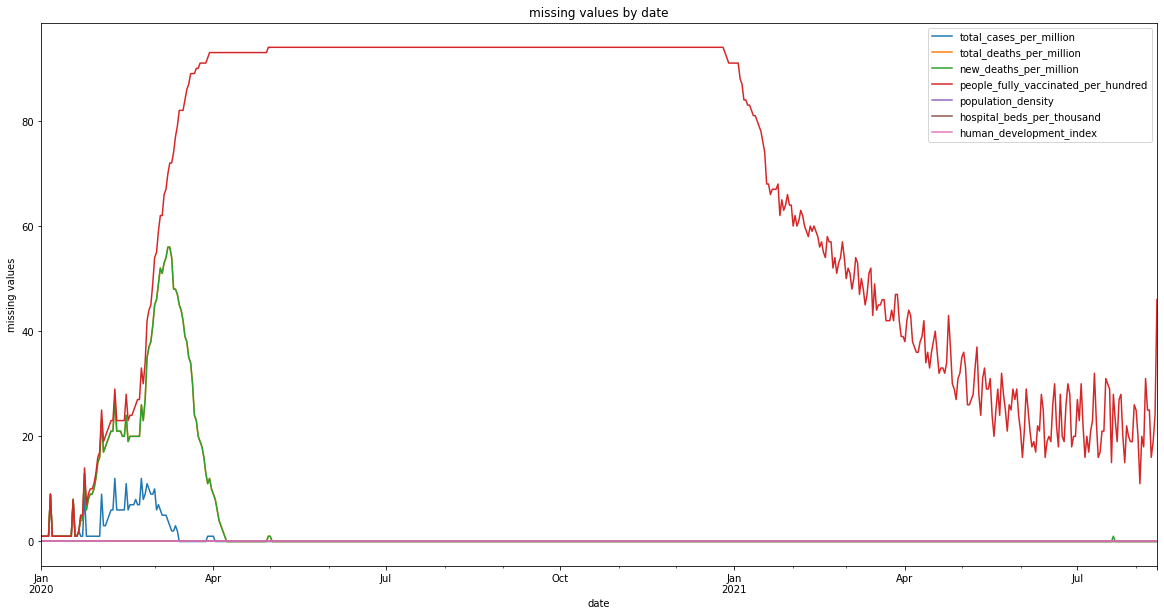

In [14]:
missing_values_by_date = countries_cleaned_dataset.set_index('date').isna().sum(level=0)
missing_values_by_date.drop(["continent", "location", "iso_code"],axis=1).plot(
    figsize=(20,10),
    title = "missing values by date",
    xlabel="date",
    ylabel="missing values",

)

start = "2020-06-01"
end = "2021-07-01"

date_cleaned_dataset = countries_cleaned_dataset[countries_cleaned_dataset["date"] <= end]
date_cleaned_dataset = date_cleaned_dataset[date_cleaned_dataset["date"] >= start]

#missing_values_by_date.sort_index().tail(2)

# löschen von Zeilen mit fehlenden Werten
date_cleaned_dataset = date_cleaned_dataset.dropna()

Die Variablen "human_development_index", "hospital_beds_per_thousand" und "population_density" sind im Datensatz konstant.

## 3.3 Feature Engineering - Kennzahlen

Das zusammenfassen von vorhandenen Features zu neuen Features wird als Feature Engineering bezeichnet. Das Ziel ist es die Daten so zu modifizieren, dass Machine Learning-Algorithmen mehr Muster identifizieren können und Informationen verdichtet werden.

Kennzahlen:
- Index der menschlichen Entwicklung:"human_development_index"

- mortality: 'total_deaths_per_million' / 'total_cases_per_million'

- Vergangene Tage: "passed_days"

In [15]:
final_dataset = date_cleaned_dataset

final_dataset["mortality"] = date_cleaned_dataset['total_deaths_per_million'] / date_cleaned_dataset['total_cases_per_million']
final_dataset["date"] = pd.to_datetime(final_dataset["date"])
final_dataset["passed_days"] = final_dataset["date"]-final_dataset["date"].min()
final_dataset["passed_days"] = final_dataset["passed_days"].astype(str).str.replace(" days", "").astype(int)

columns_to_delete = [
    "people_fully_vaccinated_per_hundred",
    "total_cases_per_million",
]

final_dataset = final_dataset.drop(columns_to_delete, 1)
final_dataset_grouped = final_dataset.groupby("location").mean()

# 4. Modelling

In folgender Streumatrix sind die verbleibenden Features gegeneinander aufgetragen und deren Korrelation so wie eine Regressionsgerade dargestellt.

highest correlations:
total_deaths_per_million  new_deaths_per_million        0.6
human_development_index   hospital_beds_per_thousand    0.5
total_deaths_per_million  human_development_index       0.4
mortality                 human_development_index      -0.4
total_deaths_per_million  passed_days                  -0.5
passed_days               human_development_index      -0.6
dtype: float64


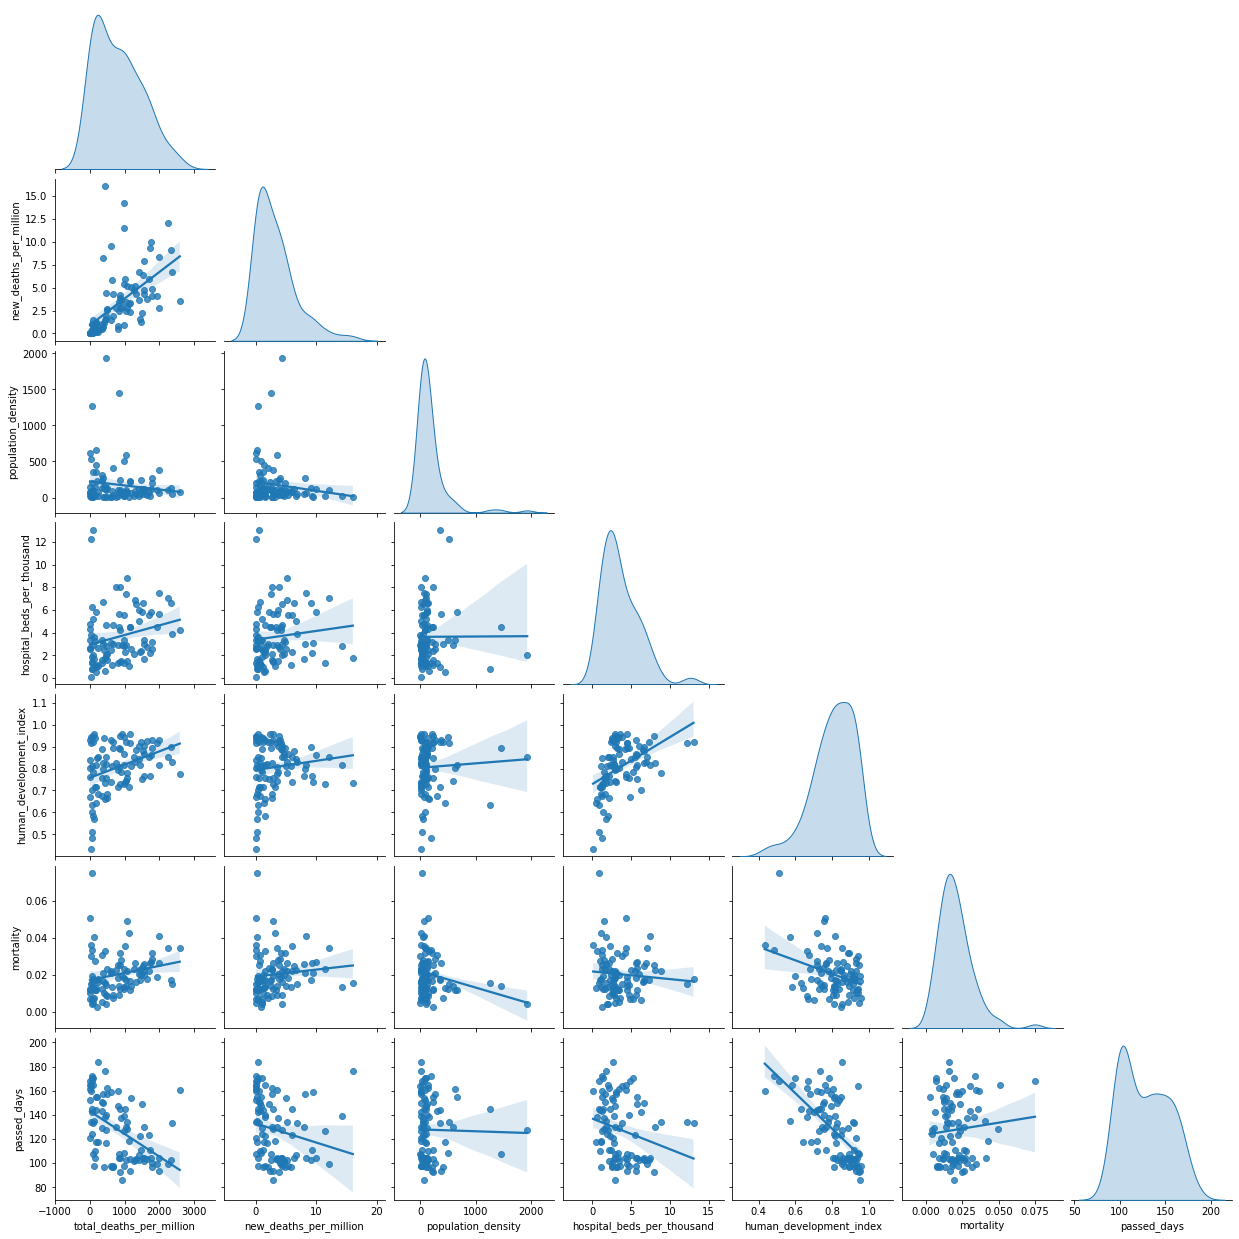

In [16]:
g = sns.pairplot(
    final_dataset_grouped, 
    corner =True, 
    diag_kind="kde", 
    kind="reg",
    #hue="continent",
)

corr = final_dataset_grouped.corr()

sorted_corr = corr.unstack().sort_values(ascending=False).drop_duplicates()
sorted_corr = sorted_corr[sorted_corr != 1].round(1)
sorted_corr = sorted_corr[abs(sorted_corr) >= 0.3]
print("highest correlations:")
print(sorted_corr)

**learnings bis jetzt:**
- Der HDI korreliert stark mit der Anzahl an Krankenhausbetten, der Mortalität und den Todeszahlen
- Die Anzahl an Krankenhausbetten korreliert stark mit den Todeszahlen
- Der Entwicklungsstand und die Anzahl Krankenhausbetten haben einen großen Einfluss auf die Todeszahlen.
   
**was prognostizieren?:**

Todeszahlen pro Millionen ("new_deaths_per_million") in Abhängigkeit von:
- Bevölkerungsdichte (population_density)
- Anzahl Krankenhausbetten pro Tausend (hospital_beds_per_thousand)
- HDI (human_development_index)
- Vergangene Tage seit Pandemie Beginn (passed_days)

In [17]:
model_columns =[
    "passed_days",
    "population_density",
    "human_development_index",
    "hospital_beds_per_thousand",  
    "new_deaths_per_million"
]

model_dataset = final_dataset.drop(final_dataset.columns.difference(model_columns), 1)

X = model_dataset.drop("new_deaths_per_million", axis=1)
y = model_dataset["new_deaths_per_million"]

# aufteilen in Trainings und Test Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Auswahl Algorithmus

Ziel: Prognose der Zielvariabel -> Supervised Learning -> Regression

https://miro.medium.com/max/1400/0*faPhpDiJ7_pZGknr.png

Algorithmen:
1. Decision Tree
    - from sklearn import tree
2. Linear Regression
    - from sklearn.linear_model import LinearRegression
3. Neural Network
    - from sklearn.neural_network import MLPClassifier
4. Gradient Boosting Tree
    - from sklearn.ensemble import GradientBoostingRegressor
5. Random Forrest
    - from sklearn.ensemble import RandomForestRegressor

**Decision Tree**

In [18]:
from sklearn.tree import DecisionTreeRegressor

start = datetime.datetime.now()
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = round(regressor.score(X_test, y_test),4)
end = datetime.datetime.now()

print('Der Score beträgt {} %'.format(score*100))
print(end-start)

# dictionary for evaluation

models = {}
models["DecisionTreeRegressor"] = score*100, end-start

Der Score beträgt 61.95 %
0:00:00.028430


**Linear Regression**

In [19]:
from sklearn.linear_model import LinearRegression

start = datetime.datetime.now()
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = round(regressor.score(X_test, y_test),4)
end = datetime.datetime.now()

print('Der Score beträgt {} %'.format(score*100))
print(end-start)

models["LinearRegression"] = score*100, end-start

Der Score beträgt 10.9 %
0:00:00.030581


**Neural Network**

In [20]:
from sklearn.neural_network import MLPRegressor

# best results with logistic/adam
activations = ["logistic", "identity", "tanh", "relu"]
solvers = ["adam", "lbfgs", "sgd"]

for activation in activations:
    for solver in solvers:
        try:
            start = datetime.datetime.now()
            regressor = MLPRegressor(activation=activation, solver = solver, max_iter=500)
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)
            score = round(regressor.score(X_test, y_test),4)
            end = datetime.datetime.now()

            print('Der Score beträgt {} % (Aktivierungsfunktion: {}, Solver: {})'.format(score*100, activation, solver))
            print(end-start)
            if score > 0:
                models["MLPRegressor_{}_{}".format(activation, solver)] = score*100, end-start
        except Exception as e:
            print(e)
        


Der Score beträgt 35.67 % (Aktivierungsfunktion: logistic, Solver: adam)
0:00:15.709979


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Der Score beträgt 24.29 % (Aktivierungsfunktion: logistic, Solver: lbfgs)
0:00:27.171699
Der Score beträgt 3.6799999999999997 % (Aktivierungsfunktion: logistic, Solver: sgd)
0:00:02.256287
Der Score beträgt 7.84 % (Aktivierungsfunktion: identity, Solver: adam)
0:00:01.669053
Der Score beträgt 10.9 % (Aktivierungsfunktion: identity, Solver: lbfgs)
0:00:04.984007


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_base.py:170: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Input contains NaN, infinity or a value too large for dtype('float64').
Der Score beträgt 42.26 % (Aktivierungsfunktion: tanh, Solver: adam)
0:00:20.151950


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Der Score beträgt 26.200000000000003 % (Aktivierungsfunktion: tanh, Solver: lbfgs)
0:00:21.025668
Der Score beträgt 2.1399999999999997 % (Aktivierungsfunktion: tanh, Solver: sgd)
0:00:00.906807
Der Score beträgt 21.77 % (Aktivierungsfunktion: relu, Solver: adam)
0:00:05.130380


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Der Score beträgt 19.33 % (Aktivierungsfunktion: relu, Solver: lbfgs)
0:00:13.986399
Der Score beträgt -23.21 % (Aktivierungsfunktion: relu, Solver: sgd)
0:00:00.636310


**Gradient Boosting Tree**

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

start = datetime.datetime.now()
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = round(regressor.score(X_test, y_test),4)
end = datetime.datetime.now()

print('Der Score beträgt {} %'.format(score*100))
print(end-start)

models["GradientBoostingRegressor"] = score*100, end-start

Der Score beträgt 62.239999999999995 %
0:00:00.501587


**Random Forrest**

In [22]:
from sklearn.ensemble import RandomForestRegressor

start = datetime.datetime.now()
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = round(regressor.score(X_test, y_test),4)
end = datetime.datetime.now()

print('Der Score beträgt {} %'.format(score*100))
print(end-start)

models["RandomForestRegressor"] = (score*100, end-start)

Der Score beträgt 74.7 %
0:00:01.805613


Der beste Algorithmus ist der RandomForestRegressor mit einem Score von 74.7 % und einer Trainingsdauer von 1.81 s


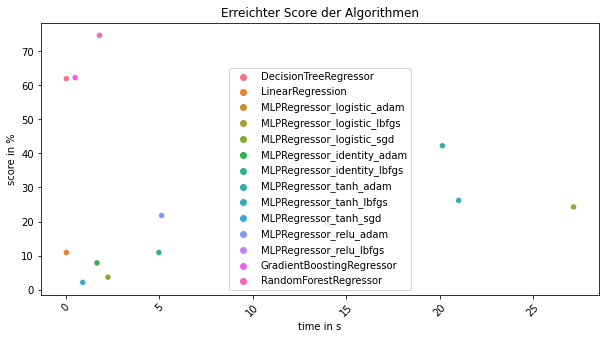

In [23]:
valuation = pd.DataFrame.from_dict(models).T
valuation.rename(columns={0: "score in %", 1: "time in s"}, inplace=True)
valuation["time in s"] = valuation["time in s"] / np.timedelta64(1, 's')

fig, ax = plt.subplots(figsize=(10,5))
plt.title("Erreichter Score der Algorithmen")
plt.xticks(rotation=45)
sns.scatterplot(x="time in s", y="score in %",hue=valuation.index, data=valuation)

best_algorithm = valuation.sort_values(by="score in %", ascending=False).head(1)
print("Der beste Algorithmus ist der {} mit einem Score von {} % und einer Trainingsdauer von {} s".format(
    best_algorithm.index.to_list()[0],
    best_algorithm["score in %"].to_list()[0],
    round(best_algorithm["time in s"].to_list()[0], 2),
))

# 4.3 Test

In [24]:
def test_model(location, 
               factor_beds, 
               factor_hdi
              ):

    test_dataset = final_dataset[final_dataset["location"] == location].reset_index()
    passed_days = int(test_dataset["passed_days"].values[-1])#+1
    
    population_density =test_dataset["population_density"].mean()
    hospital_beds_per_thousand = round(test_dataset["hospital_beds_per_thousand"].mean(),2)
    human_development_index = round(test_dataset["human_development_index"].mean(),2)

    factor_beds = 1 + factor_beds/100
    factor_hdi = 1 + factor_hdi/100
    
    new_hospital_beds_per_thousand = round(hospital_beds_per_thousand*factor_beds,2)
    new_human_development_index = round(human_development_index*factor_hdi,2)
    if new_human_development_index > 1:
        new_human_development_index = 1
        print("Der HDI hat einen maximalen Wert von 1")
        

    pred_dataframe = pd.DataFrame(
        data = {
            "population_density": np.full((1, passed_days), population_density)[0].tolist(),
            "hospital_beds_per_thousand": np.full((1, passed_days), new_hospital_beds_per_thousand)[0].tolist(),
            "human_development_index": np.full((1, passed_days), new_human_development_index)[0].tolist(),
            "passed_days": np.arange(0, passed_days, 1)
        }
    )

    pred_dataframe["predicted_new_deaths_per_million"] = regressor.predict(pred_dataframe)
    pred_dataframe["real_new_deaths_per_million"] = test_dataset.set_index("passed_days")["new_deaths_per_million"]

    real_total_deaths_per_million = pred_dataframe[['real_new_deaths_per_million']].dropna().cumsum().tail(1).values[0][0]#.notna()[::-1].idxmax().values[0]#
    predicted_total_deaths_per_million = pred_dataframe[['predicted_new_deaths_per_million']].cumsum().tail(1).values[0][0]
    
    improvement = round(100*(1-(predicted_total_deaths_per_million/real_total_deaths_per_million)), 2)
    
    if factor_beds != 1 or factor_hdi != 1:
        if human_development_index != new_human_development_index:
            print("Bei Änderung des HDIs von {} auf {}".format(human_development_index, new_human_development_index))
        if hospital_beds_per_thousand != new_hospital_beds_per_thousand:
            print("Bei Änderung der Anzahl Krankenhausbetten pro Tausend Einwohner von {} auf {}".format(hospital_beds_per_thousand, new_hospital_beds_per_thousand))

        if improvement > 0:
            print("Sinken die Todeszahlen um {} %".format(improvement))
        else:
            print("Steigen die Todeszahlen um {} %".format(improvement))
    

    else:
        print("Die Todeszahlen des Modells unterscheiden sich um {} % von den realen Werten".format(improvement))
        
    fig, ax = plt.subplots(figsize=(20,5))
    plt.ylabel("new deaths per million")
    plt.title("Verlauf der neuen Todesfälle in {}".format(location))
    sns.lineplot(x="passed_days", y="real_new_deaths_per_million", data = pred_dataframe, color="g", label="real")
    sns.lineplot(x="passed_days", y="predicted_new_deaths_per_million", data = pred_dataframe, color= "r", label="predicted")

    fig, ax = plt.subplots(figsize=(20,5))
    plt.title("kumulierte Todesfälle in {}".format(location))
    plt.ylabel("deaths per million")
    
    sns.lineplot(
        x="passed_days", 
        y="predicted_new_deaths_per_million", 
        data =  pd.concat(
            [pred_dataframe[['predicted_new_deaths_per_million']].cumsum(),
             pred_dataframe['passed_days']], axis=1),
        color="r", 
        label="predicted")
    
    sns.lineplot(
        x="passed_days", 
        y="total_deaths_per_million", 
        data = final_dataset[final_dataset["location"] == location],
        color="g", 
        label="real")


locations=final_dataset["location"].unique().tolist()

factor_beds_slider = widgets.IntSlider(min=0, max=100, step=1, value=0, continuous_update=True,)
factor_hdi_slider = widgets.IntSlider(min=0, max=100, step=1, value=0, continuous_update=True,)

interact(test_model, location=locations, 
    factor_beds = factor_beds_slider, 
    factor_hdi = factor_hdi_slider
        )


interactive(children=(Dropdown(description='location', options=('Germany', 'Switzerland', 'Belgium', 'Israel',…

<function __main__.test_model(location, factor_beds, factor_hdi)>

# 5. Fazit

Zwischen den Todeszahlen und dem Entwicklungsstand eines Landes ist ein Zusammenhang zu erkennen. 
Die Auswirkung der Veränderung des HDI und der Anzahl Krankenhausbetten pro Tausend Einwohner auf den Pandemieverlauf kann durch das entwickelte Modell prognostiziert werden. Jedoch ist das Modell aufgrund der  schlechten Datenlage teilweise instabil. Aus diesem Grund sollten die Prognosen nur für Länder mit guter Datenlage angewandt werden.


Um die Qualität der Prognosen zu verbessern muss sich vor allem langfristig die Datenlage verbessern. Mehr Länder müssen tagesaktuell wichtige Kennzahlen übermitteln. Damit wird es dann möglich, auf lange Sicht möglichst genau den Verlauf der Corona Pandemie zu prognostizieren. Dies kann dazu betragen frühzeitig und angemessen Coronabedingte Beschränkungen zu erlassen oder aufzuheben. So können Menschenleben gerettet werden und unnötige Beschränkungen für die Gesellschaft vermieden werden. 

Zu beachten ist, dass die Corona Pandemie eine gewisse Eigendynamik mit sich bringt. Es können beispielweise unvorhergesehen neue deutlich ansteckendere  Varianten auftreten, die den Verlauf der Pandemie stark beeinflussen können. Diese Szenarien werden in dieser Arbeit nicht berücksichtigt. 

# 6. Ausblick

Zukünftig sollten noch mehr Parameter in die Prognose der Corona Pandemie einbezogen werden. Des Weiteren sollten Virusvarianten und deren Anteil im Infektionsgeschehen berücksichtigt werden. Außerdem können weitere Algorithmen getestet werden um eine möglichst gute Prognose zu gewährleisten. Damit kann die Qualität der Prognose weiter gesteigert werden. Die Evaluation des Modells kann weiterhin mit zukünftigen Daten erfolgen.

